In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  pandas.plotting import scatter_matrix
%matplotlib inline
pd.set_option('display.max_columns', 999)

The dataset I will be working on was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/). The data cunducts surveys and aggregate data of job outcomes of students who graduated college between 2010 and 2012.
Each row in the dataset represents a different major in college and contains information.
- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
raw_data_count = 173

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [9]:
cleaned_data_count = 172

In [10]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

### Plot #1 Sample size & Median

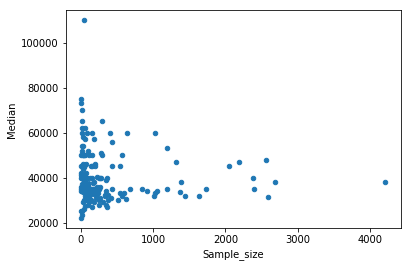

In [11]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

### Conclusions and Outliers

I can read from this plot that there is no bigger group that have a median higher than 60000. The major part is located between 25000 and 45000.
<br>I also see some outliers, I need to check this values

In [12]:
recent_grads[recent_grads.Sample_size > 4000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.47319,4212,276234,251540,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


This is a row with the largest sample size - 4212. The mojor for this group is 'BUSINESS MANAGEMENT AND ADMINISTRATION'. This is a large group with median earning at the bottom of the border

In [13]:
top_median = recent_grads[recent_grads.Median > 80000]
top_median

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193


The second outliers stands out because of Median that has reached 110000. The major for this group is 'PETROLEUM ENGINEERING'. The total and the sample size is small compared to the previous one, this is a less frequent specialization. In this sample ShareWoman is just 12%

### Plot #2 Sample size & Unemployement rate

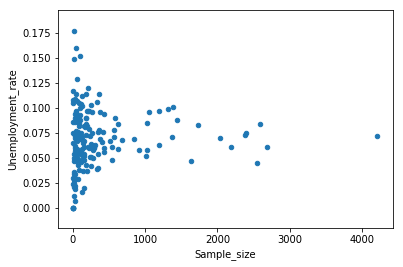

In [14]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

Groups with Sample_size greater than 2000:

In [15]:
recent_grads.Major[recent_grads.Sample_size > 2000]

34                                    NURSING
35                                    FINANCE
40                                 ACCOUNTING
57                           GENERAL BUSINESS
76     BUSINESS MANAGEMENT AND ADMINISTRATION
77           MARKETING AND MARKETING RESEARCH
93                             COMMUNICATIONS
145                                PSYCHOLOGY
Name: Major, dtype: object

The highest unemployement rate(around or above 15%) applies to 4 groups:

In [16]:
recent_grads.Major[recent_grads.Unemployment_rate > 0.145]

5                             NUCLEAR ENGINEERING
84     COMPUTER NETWORKING AND TELECOMMUNICATIONS
89                          PUBLIC ADMINISTRATION
170                           CLINICAL PSYCHOLOGY
Name: Major, dtype: object

Unemployement rate lower than 5%:

In [17]:
recent_grads.Major[recent_grads.Unemployment_rate < 0.005]

52               MATHEMATICS AND COMPUTER SCIENCE
73                          MILITARY TECHNOLOGIES
83                                         BOTANY
112                                  SOIL SCIENCE
120    EDUCATIONAL ADMINISTRATION AND SUPERVISION
Name: Major, dtype: object

### Conclusions and Outliers

The largest group, which is a 'BUSINESS MANAGEMENT AND ADMINISTRATION', has average unemployment like other big groups(groups with sample size greater than 2000 are listed above). 
- There are 4 groups with unemployement rate around or above 15%. 
- There are 5 groups with unemployement rate below 5%.
- The most popular groups with the largest sample size have average unemployement rate


### Plot #3 Full time & Median

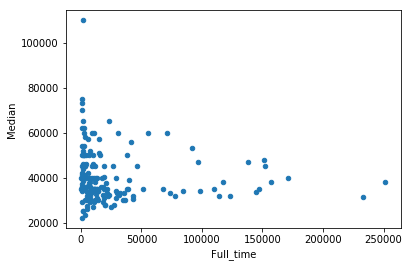

In [18]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter')

In [19]:
recent_grads.Major[recent_grads.Full_time > 200000]

76     BUSINESS MANAGEMENT AND ADMINISTRATION
145                                PSYCHOLOGY
Name: Major, dtype: object

an outlier on the Median axix is already assigned to the variable top_median

In [20]:
top_median

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193


### Conclusions and Outliers

The data above shows that the groups with the highest population, working full time earn little money. The group with great earning is 'PETROLEUM ENGINEERING', this group is few but unemployement is low and full_time is high.

### Plot #4 Share women & Unemployement rate

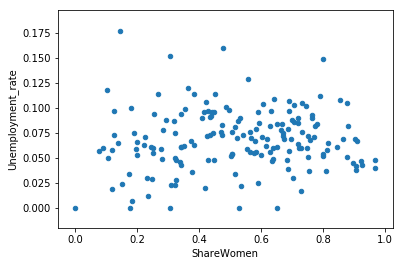

In [21]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

In [22]:
recent_grads[recent_grads.ShareWomen == 0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,111,0,111,0,0.0,40000,40000,40000,0,0,0


In [23]:
recent_grads.Major[recent_grads.Unemployment_rate > 0.14]

5                             NUCLEAR ENGINEERING
84     COMPUTER NETWORKING AND TELECOMMUNICATIONS
89                          PUBLIC ADMINISTRATION
170                           CLINICAL PSYCHOLOGY
Name: Major, dtype: object

In [24]:
recent_grads.Major[recent_grads.Unemployment_rate < 0.02]

0                           PETROLEUM ENGINEERING
14      ENGINEERING MECHANICS PHYSICS AND SCIENCE
19                                COURT REPORTING
52               MATHEMATICS AND COMPUTER SCIENCE
64                            GENERAL AGRICULTURE
73                          MILITARY TECHNOLOGIES
83                                         BOTANY
112                                  SOIL SCIENCE
119                 MATHEMATICS TEACHER EDUCATION
120    EDUCATIONAL ADMINISTRATION AND SUPERVISION
Name: Major, dtype: object

In [25]:
recent_grads.Major[recent_grads.ShareWomen > 0.8]

34                                           NURSING
51                        MEDICAL ASSISTING SERVICES
55                         SCHOOL STUDENT COUNSELING
88          MISCELLANEOUS HEALTH MEDICAL PROFESSIONS
100                          SPECIAL NEEDS EDUCATION
103                               NUTRITION SCIENCES
113                                GENERAL EDUCATION
128                     LANGUAGE AND DRAMA EDUCATION
138                             ELEMENTARY EDUCATION
148                        ART HISTORY AND CRITICISM
150                     FAMILY AND CONSUMER SCIENCES
151                                      SOCIAL WORK
154               TEACHER EDUCATION: MULTIPLE LEVELS
156        HUMAN SERVICES AND COMMUNITY ORGANIZATION
163    COMMUNICATION DISORDERS SCIENCES AND SERVICES
164                        EARLY CHILDHOOD EDUCATION
169                           EDUCATIONAL PSYCHOLOGY
172                                  LIBRARY SCIENCE
Name: Major, dtype: object

### Conclusions and Outliers

There is no visible trends on the plot above. 
<br>Even if jobs that are dominated by a woman, the unemployement rate is average.
<br>The outlier is 'MILITARY TECHNOLOGIES'with no woman at all, there is also no unemployement and people work just full time. This data should be complied with other data to find out is there a problem with hiring woman in the learned profession.

### Plot #5 Men & Median 

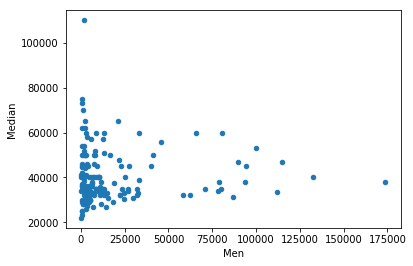

In [26]:
recent_grads.plot(x='Men', y='Median', kind='scatter')

### Plot #6 Women & Median

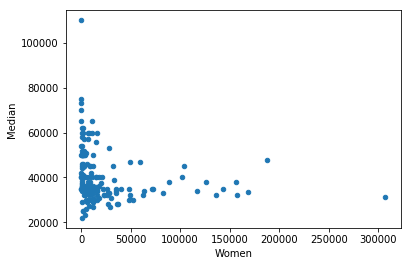

In [27]:
recent_grads.plot(x='Women', y='Median', kind='scatter')

In [28]:
recent_grads.Major[recent_grads.Women > 250000]

145    PSYCHOLOGY
Name: Major, dtype: object

In [29]:
recent_grads[recent_grads.Major == 'PSYCHOLOGY']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,233205,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207


In [30]:
recent_grads.Major[recent_grads.Men > 150000]

76    BUSINESS MANAGEMENT AND ADMINISTRATION
Name: Major, dtype: object

In [31]:
recent_grads[recent_grads.Major == 'BUSINESS MANAGEMENT AND ADMINISTRATION']

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.47319,4212,276234,251540,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


### Conclusions and Outliers

There is a difference between two plots above. On the chart with Men exists groups aboove 50000 that earn around 60000 and there are no such group on the chart with women. Such group earn arounf 40000. Tere is a need to check a proffesions - are this the same proffesions but the median is so much different or this proffesions are different with different skill set.

- The largest group of women also is making the least money, and this is 'PSYCHOLOGY'. The median is 31500, there are 78% of women there
- The largest group of men is 'BUSINESS MANAGEMENT AND ADMINISTRATION' with median 38000, there are 47% of women there

In [32]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]


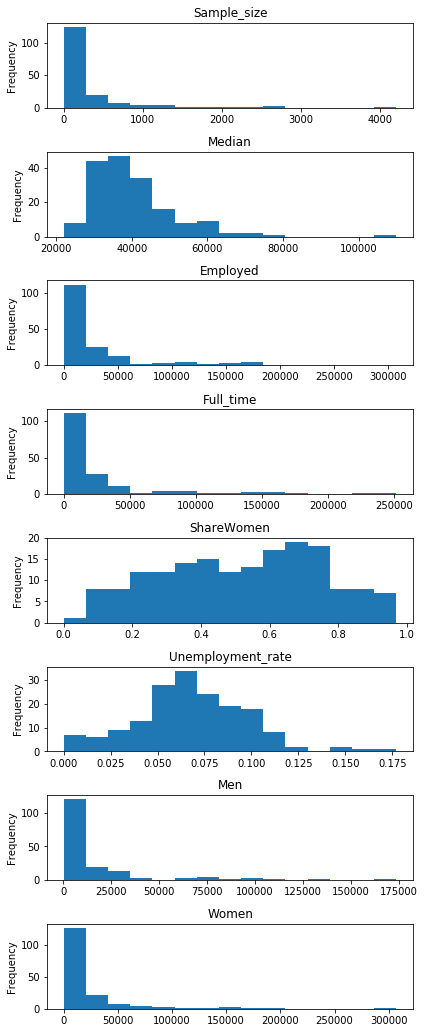

In [33]:
fig = plt.figure(figsize=(6,16))
for col in range(len(cols)):
    ax = fig.add_subplot(9,1,col+1)
    ax = recent_grads[cols[col]].plot(kind='hist', bins = 15)
    ax.set_title(cols[col])
    fig.tight_layout()
    

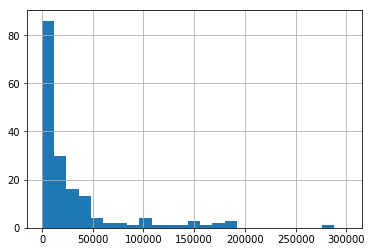

In [34]:
recent_grads['Employed'].hist(bins=25, range=(0,300000))

Many histograms above not giving me much value. I think that the most important will be a Median, ShareWomen and Unemployement Rate

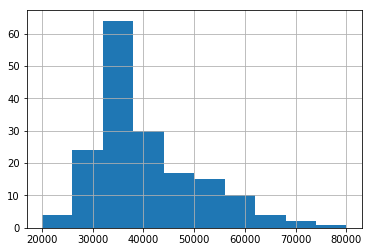

In [35]:
recent_grads['Median'].hist(bins=10, range=(20000,80000))

I removed the highest income to have a better view. The most common median is 35000.

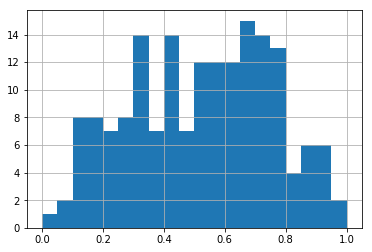

In [36]:
recent_grads['ShareWomen'].hist(bins=20, range=(0,1))

It looks like there is a bit more Majors that are dominated by woman.

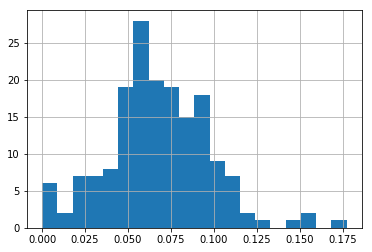

In [37]:
recent_grads['Unemployment_rate'].hist(bins=20)

The most common unemployment rate is 0.06.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A4EDB38>,
      dtype=object)

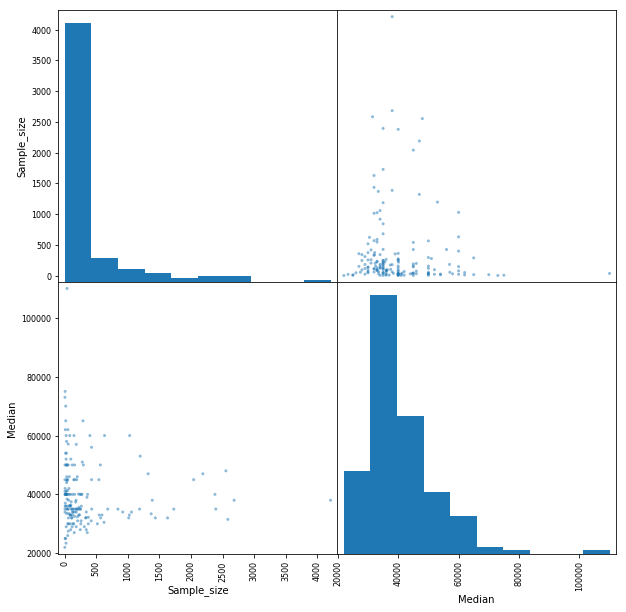

In [38]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A4FAC88>,
      dtype=object)

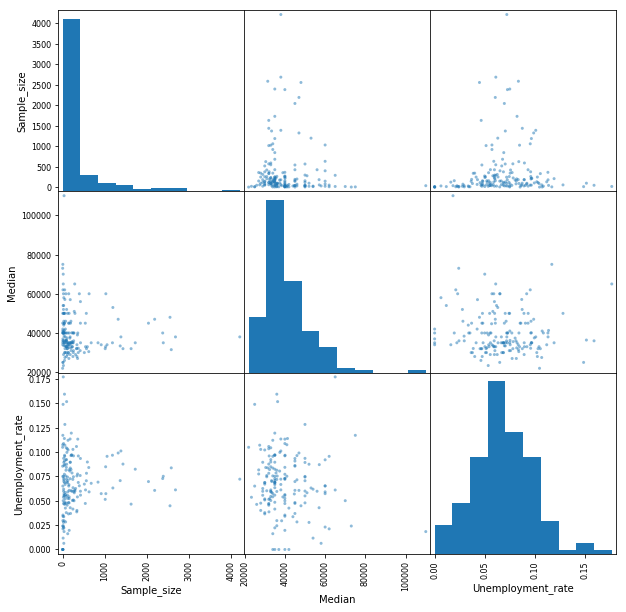

In [39]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B07A198>,
      dtype=object)

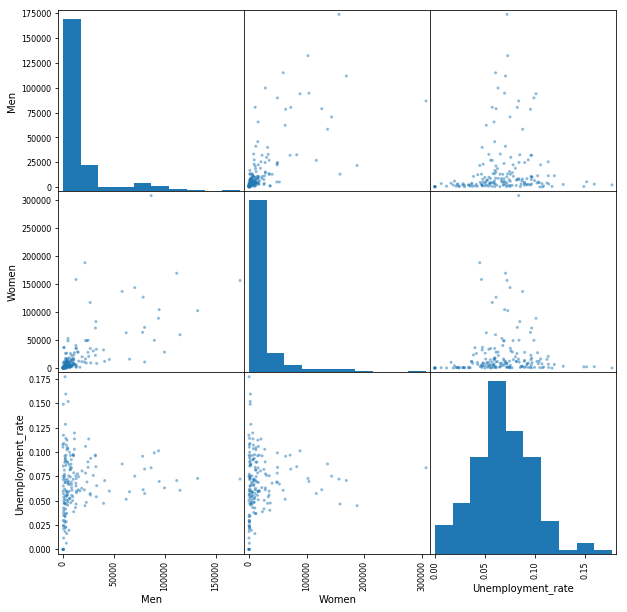

In [40]:
scatter_matrix(recent_grads[['Men', 'Women', 'Unemployment_rate']], figsize=(10,10))

Unemployement rate looks quite similar for Men and Woman in range 0:150000. Plot for women is a bit longer because of one data at the value 300000 so the coclusion is that there is no such big group for men but anyway the rate is in the middle of the range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B49CEF0>,
      dtype=object)

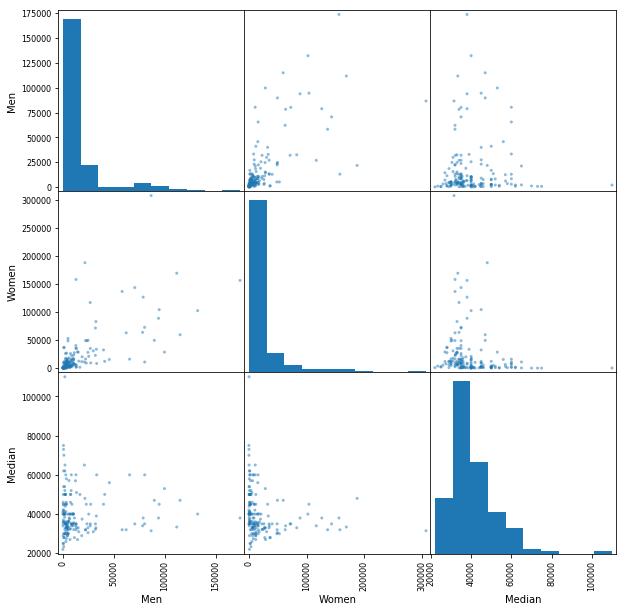

In [41]:
scatter_matrix(recent_grads[['Men', 'Women', 'Median']], figsize=(10,10))

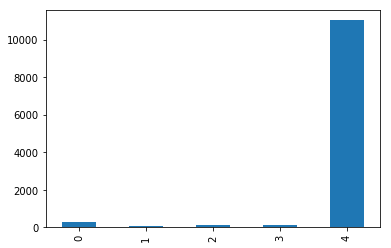

In [42]:
recent_grads[:5]['Women'].plot(kind='bar')

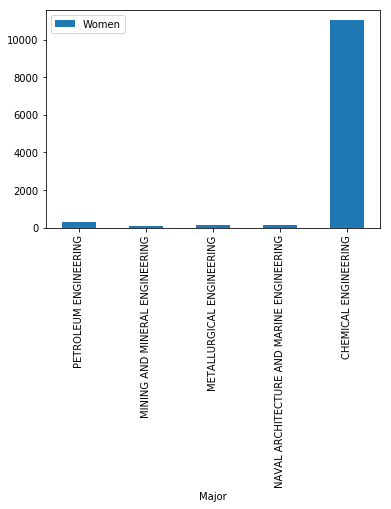

In [43]:
recent_grads[:5].plot.bar(x='Major', y='Women')

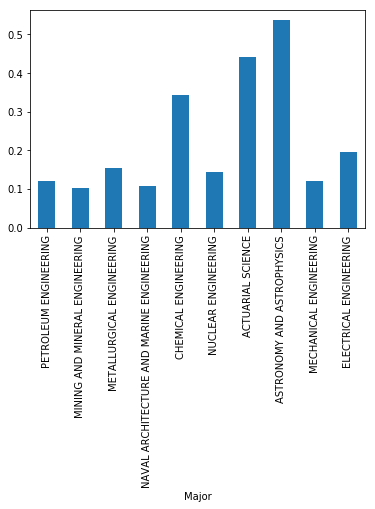

In [44]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

In the samples above it is clear that there is not many women in technical Majors. Just in the 'Astronomy and Astrophysics' and 'Actuarial Science' it is almost equal.

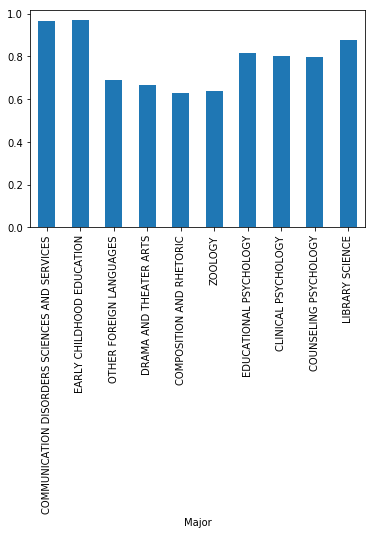

In [45]:
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=False)

In the samples from the end of the dataset I see a Mojors that are totally dominated by a womens. Most of the above got more than 80% of women.